In [24]:
#https://greenteapress.com/wp/think-stats-2e/
from __future__ import print_function, division
import statsmodels.formula.api as smf
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline
import thinkstats2
from thinkstats2 import Mean, MeanVar, Var, Std, Cov
import thinkplot
import math
import first
import brfss
import nsfg
import calendar
import re
import statsmodels.tsa.stattools as smtsa
import survival
from collections import Counter
import seaborn as sns


In [8]:
pd.set_option('max_column',500)
dataset = pd.read_csv('dataanime.csv')

In [9]:
dataset.sample(5)

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
879,Koyomimonogatari,ONA,12,Finished Airing,2016-1-10,2016-3-27,-,-,"Aniplex,Kodansha",Aniplex of America,Shaft,Light novel,"Mystery,Comedy,Supernatural",14 min. per ep.,R,7.77,43529,91001,195,"In each episode, Koyomi is presented with a my..."
963,Kemono Friends,TV,12,Finished Airing,2017-1-11,2017-3-29,Winter,Wednesdays at 01:35 (JST),"TV Tokyo,Victor Entertainment,AT-X,KlockWorx,f...",Crunchyroll,Yaoyorozu,Game,"Adventure,Comedy,Fantasy",24 min. per ep.,PG,7.73,17056,44690,751,Japari Park is an untamed paradise where many ...
546,Zan Sayonara Zetsubou Sensei,TV,13,Finished Airing,2009-7-5,2009-9-27,Summer,-,-,-,Shaft,Manga,"Parody,Comedy,School",23 min. per ep.,R,7.97,27166,66220,179,Nozomu Itoshiki is still the bizarre teacher o...
1338,Yu☆Gi☆Oh! Duel Monsters,TV,224,Finished Airing,2000-4-18,2004-9-29,Spring,-,Nihon Ad Systems,"4Kids Entertainment,Flatiron Film Company",Studio Gallop,Manga,"Adventure,Game,Shounen",23 min. per ep.,PG-13,7.57,112045,181885,2574,Legend says that the enigmatic Millennium Puzz...
1535,Mahou Shoujo Lyrical Nanoha,TV,13,Finished Airing,2004-10-3,2004-12-26,Fall,-,"Starchild Records,Omnibus Japan",Geneon Entertainment USA,Seven Arcs,Original,"Action,Comedy,Drama,Magic,Super Power",25 min. per ep.,PG-13,7.49,31358,72891,926,Third grader Takamachi Nanoha stumbled upon an...


In [10]:
dataset.keys()

Index(['Title', 'Type', 'Episodes', 'Status', 'Start airing', 'End airing',
       'Starting season', 'Broadcast time', 'Producers', 'Licensors',
       'Studios', 'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       'Scored by', 'Members', 'Favorites', 'Description'],
      dtype='object')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 20 columns):
Title              1563 non-null object
Type               1563 non-null object
Episodes           1563 non-null object
Status             1563 non-null object
Start airing       1563 non-null object
End airing         1563 non-null object
Starting season    1563 non-null object
Broadcast time     1563 non-null object
Producers          1563 non-null object
Licensors          1563 non-null object
Studios            1563 non-null object
Sources            1563 non-null object
Genres             1563 non-null object
Duration           1563 non-null object
Rating             1563 non-null object
Score              1563 non-null float64
Scored by          1563 non-null int64
Members            1563 non-null int64
Favorites          1563 non-null int64
Description        1563 non-null object
dtypes: float64(1), int64(3), object(16)
memory usage: 244.3+ KB


In [12]:
dataset.nunique()

Title              1563
Type                  6
Episodes            107
Status                2
Start airing       1170
End airing          761
Starting season       5
Broadcast time      199
Producers           809
Licensors           111
Studios             200
Sources              14
Genres             1004
Duration            171
Rating                5
Score               146
Scored by          1548
Members            1548
Favorites           924
Description        1545
dtype: int64

In [13]:
dataset=dataset.rename(columns=lambda x: x.replace(' ', '_'))

In [14]:
cleaned_data=dataset.drop(['Title','Episodes' ,'Producers','Licensors','Starting_season','Studios','Genres', 'Duration', 'Members','Favorites','Description','Start_airing' ,'End_airing', 'Broadcast_time' ,'Scored_by'],axis=1) 

In [15]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 5 columns):
Type       1563 non-null object
Status     1563 non-null object
Sources    1563 non-null object
Rating     1563 non-null object
Score      1563 non-null float64
dtypes: float64(1), object(4)
memory usage: 61.1+ KB


In [16]:
cleaned_data.head()

,Type,Status,Sources,Rating,Score
0,TV,Finished Airing,Manga,R,9.25
1,Movie,Finished Airing,Original,PG-13,9.19
2,TV,Finished Airing,Manga,R,9.16
3,TV,Currently Airing,Visual novel,PG-13,9.16
4,TV,Finished Airing,Visual novel,PG-13,9.14


In [88]:
cleaned_data.Type.value_counts()

TV       821
Movie    333
Name: Type, dtype: int64

In [18]:
cleaned_data.dropna(inplace=True) 

In [87]:
cleaned_data=cleaned_data[cleaned_data.Type!='Music']
cleaned_data=cleaned_data[cleaned_data.Type!='ONA']
cleaned_data=cleaned_data[cleaned_data.Type!='Special']
cleaned_data=cleaned_data[cleaned_data.Type!='OVA']

In [20]:
cleaned_data.isna().sum()

Type       0
Status     0
Sources    0
Rating     0
Score      0
dtype: int64

In [39]:
cleaned_data.head()

,Type,Status,Sources,Rating,Score
0,TV,Finished_Airing,Manga,R,9.25
1,Movie,Finished_Airing,Original,PG-13,9.19
2,TV,Finished_Airing,Manga,R,9.16
3,TV,Currently_Airing,Visual novel,PG-13,9.16
4,TV,Finished_Airing,Visual novel,PG-13,9.14


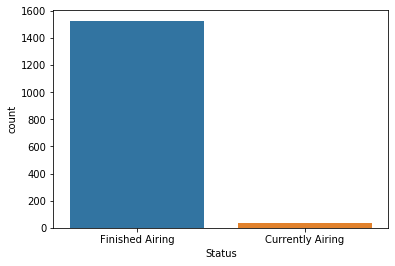

In [25]:
sns.countplot(dataset.Status)

In [64]:
cleaned_data["Rating"]= cleaned_data["Rating"].replace("R", "5") 
cleaned_data["Rating"]= cleaned_data["Rating"].replace("PG-13", "4") 
cleaned_data["Rating"]= cleaned_data["Rating"].replace("PG", "3") 
cleaned_data["Rating"]= cleaned_data["Rating"].replace("G", "2") 
cleaned_data["Rating"]= cleaned_data["Rating"].replace("None", "1") 

In [60]:
cleaned_data.Sources=pd.factorize(cleaned_data.Sources)[0]+1

In [56]:
cleaned_data["Status"]= cleaned_data["Status"].replace("Finished_Airing", "0") 
cleaned_data["Status"]= cleaned_data["Status"].replace("Currently_Airing", "1") 

In [63]:
cleaned_data.Rating.unique()

array(['R', 'PG-13', 'PG', 'G', 'None'], dtype=object)

In [89]:
x=cleaned_data.drop('Type',axis=1).values
y=cleaned_data.Type.values

In [90]:
x.shape

(1154, 4)

In [91]:
y.shape

(1154,)

In [92]:
cleaned_data.Sources.unique().shape

(14,)

In [93]:
pd.get_dummies(cleaned_data.drop('Type',axis=1)).values

array([[1.  , 9.25, 1.  , ..., 0.  , 0.  , 1.  ],
       [2.  , 9.19, 1.  , ..., 0.  , 1.  , 0.  ],
       [1.  , 9.16, 1.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [1.  , 7.48, 1.  , ..., 0.  , 1.  , 0.  ],
       [9.  , 7.48, 1.  , ..., 0.  , 1.  , 0.  ],
       [2.  , 7.48, 1.  , ..., 0.  , 0.  , 1.  ]])

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
st_sc=StandardScaler()

In [94]:
x=st_sc.fit_transform(x)

In [69]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=0,stratify=y)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn=KNeighborsClassifier()

In [97]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [98]:
y_preds=knn.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [99]:
accuracy_score(y_test,y_preds)

0.7056277056277056

In [100]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[ 15,  52],
       [ 16, 148]], dtype=int64)

In [101]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       Movie       0.48      0.22      0.31        67
          TV       0.74      0.90      0.81       164

    accuracy                           0.71       231
   macro avg       0.61      0.56      0.56       231
weighted avg       0.67      0.71      0.67       231



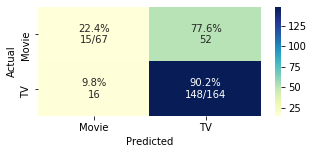

In [102]:
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)

cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

fig, ax = plt.subplots(figsize=[5,2])

sns.heatmap(cm, cmap= "YlGnBu", annot= annot, fmt='', ax=ax)

In [103]:
np.unique(y_test, return_counts=True)

(array(['Movie', 'TV'], dtype=object), array([ 67, 164], dtype=int64))

In [108]:
print('recall is: ',115 / (115 + 16))

recall is:  0.8778625954198473


In [106]:
148+16

164

In [107]:
print('precision is: ',148/(148+52))

precision is:  0.74


In [109]:
np.unique(y_test, return_counts=True)

(array(['Movie', 'TV'], dtype=object), array([ 67, 164], dtype=int64))

In [110]:
from sklearn.metrics import precision_score, recall_score

In [123]:
y_preds_n = []
for n in np.arange(1, 12,2):
    knn_n = KNeighborsClassifier(n)
    knn_n.fit(X_train, y_train)
    y_preds_n = knn_n.predict(X_test)
    print('REPORT FOR ', n , ' neigbors. Accuracy is: ',accuracy_score(y_test, y_preds),
    '\nprecision is: ',precision_score(y_test, y_preds, pos_label="Movie"),
    'recall is: ',recall_score(y_test, y_preds, pos_label="Movie"))
    

REPORT FOR  1  neigbors. Accuracy is:  0.7056277056277056 
precision is:  0.4838709677419355 recall is:  0.22388059701492538
REPORT FOR  3  neigbors. Accuracy is:  0.7056277056277056 
precision is:  0.4838709677419355 recall is:  0.22388059701492538
REPORT FOR  5  neigbors. Accuracy is:  0.7056277056277056 
precision is:  0.4838709677419355 recall is:  0.22388059701492538
REPORT FOR  7  neigbors. Accuracy is:  0.7056277056277056 
precision is:  0.4838709677419355 recall is:  0.22388059701492538
REPORT FOR  9  neigbors. Accuracy is:  0.7056277056277056 
precision is:  0.4838709677419355 recall is:  0.22388059701492538
REPORT FOR  11  neigbors. Accuracy is:  0.7056277056277056 
precision is:  0.4838709677419355 recall is:  0.22388059701492538


In [141]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_safe_indexing' from 'sklearn.utils' (C:\Users\LENOVO\Desktop\turyk\ThinkStats2-master\code\sklearn\utils\__init__.py)

In [138]:
from sklearn.neighbors import _base

In [140]:
from sklearn.utils import __init__

In [133]:
cleaned_dataset.columns=transactions.columns.str.replace(Status)

NameError: name 'transactions' is not defined

In [54]:
dataa .Type.unique()

array(['TV', 'Movie', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [55]:
inds=dataa [dataa ['Date']=='-'].index
dataa .drop(index=inds,inplace=True)

In [56]:
pd.value_counts(dataa ['Date']).sort_index()

1970-4-1      1
1971-10-24    1
1974-10-6     1
1975-10-5     1
1976-10-1     1
1977-10-2     1
1977-6-4      1
1978-1-1      1
1978-10-14    1
1978-10-8     1
1978-3-14     1
1978-4-4      1
1978-9-14     1
1979-1-7      1
1979-10-10    1
1979-12-15    1
1979-2-4      1
1979-4-7      1
1979-8-4      1
1980-10-13    1
1980-7-16     1
1981-10-14    1
1981-10-23    1
1981-7-11     1
1981-8-22     1
1982-10-13    1
1982-10-3     1
1982-2-6      1
1982-3-13     1
1982-4-9      1
             ..
2017-9-29     1
2017-9-30     1
2018-1-11     1
2018-1-12     4
2018-1-13     3
2018-1-17     1
2018-1-2      1
2018-1-20     1
2018-1-4      1
2018-1-6      1
2018-1-7      4
2018-1-8      2
2018-1-9      2
2018-2-10     1
2018-2-17     1
2018-2-22     1
2018-2-23     1
2018-2-24     1
2018-2-3      1
2018-3-2      1
2018-3-21     1
2018-3-28     1
2018-3-3      1
2018-4-12     1
2018-4-13     3
2018-4-3      2
2018-4-4      1
2018-4-6      3
2018-4-7      3
2018-4-8      2
Name: Date, Length: 1169

In [57]:
dataa ['Date']=pd.to_datetime(transactions['Date'])

This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows.

In [58]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 0 to 1562
Data columns (total 20 columns):
Title              1549 non-null object
Type               1549 non-null object
Episodes           1549 non-null object
Status             1549 non-null object
Date               1549 non-null datetime64[ns]
End airing         1549 non-null object
Starting season    1549 non-null object
Broadcast time     1549 non-null object
Producers          1549 non-null object
Licensors          1549 non-null object
Studios            1549 non-null object
Sources            1549 non-null object
Genres             1549 non-null object
Duration           1549 non-null object
Rating             1549 non-null object
Score              1549 non-null float64
Scored by          1549 non-null int64
Members            1549 non-null int64
Favorites          1549 non-null int64
Description        1549 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(15)
memory usage: 254.1+ KB


In [59]:
def MakeSurvivalFromCdf(cdf, label=''):
    ts = cdf.xs
    ss = 1 - cdf.ps
    return survival.SurvivalFunction(ts, ss, label)

In [60]:
dataa.isna().sum()

Title              0
Type               0
Episodes           0
Status             0
Date               0
End airing         0
Starting season    0
Broadcast time     0
Producers          0
Licensors          0
Studios            0
Sources            0
Genres             0
Duration           0
Rating             0
Score              0
Scored by          0
Members            0
Favorites          0
Description        0
dtype: int64

In [61]:
def EstimateHazardFunction(complete, ongoing, label='', verbose=False):
    if np.sum(np.isnan(complete)):
        raise ValueError("complete contains NaNs")
    if np.sum(np.isnan(ongoing)):
        raise ValueError("ongoing contains NaNs")

    hist_complete = Counter(complete)
    hist_ongoing = Counter(ongoing)

    ts = list(hist_complete | hist_ongoing)
    ts.sort()

    at_risk = len(complete) + len(ongoing)

    lams = pd.Series(index=ts)
    for t in ts:
        ended = hist_complete[t]
        censored = hist_ongoing[t]

        lams[t] = ended / at_risk
        if verbose:
            print(t, at_risk, ended, censored, lams[t])
        at_risk -= ended + censored

    return survival.HazardFunction(lams, label=label)

In [62]:
def EstimateMarriageSurvival(dataa):
    x = dataa[(dataa['Score']>5)].Episodes
    y = dataa[(dataa['Score']<5)].Episodes

    hf = EstimateHazardFunction(x, y)
    sf = hf.MakeSurvival()

    return hf, sf

In [64]:
def PlotPredictionsByDecade(groups, **options):
    hfs = []
    for _, group in groups:
        hf, sf = EstimateMarriageSurvival(group)
        hfs.append(hf)

    thinkplot.PrePlot(len(hfs))
    for i, hf in enumerate(hfs):
        if i > 0:
            hf.Extend(hfs[i-1])
        sf = hf.MakeSurvival()
        thinkplot.Plot(sf, **options)

In [65]:


def AddLabelsByDecade(groups, **options):
    thinkplot.PrePlot(len(groups))
    for name, _ in groups:
        label = '%d0s' % name
        thinkplot.Plot([15], [1], alabel=label, **options)

In [66]:
def EstimateMarriageSurvivalByDecade(groups, **options):
    thinkplot.PrePlot(len(groups))
    for _, group in groups:
        _, sf = EstimateMarriageSurvival(group)
        thinkplot.Plot(sf, **options)

In [77]:
def PlotResampledByDecade(resps, iters=11, predict_flag=False, omit=None):
    for i in range(iters):
        samples = [thinkstats2.ResampleRows(resp) 
                   for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        groups = sample.groupby('decade')

        if omit:
            groups = [(name, group) for name, group in groups 
                      if name not in omit]

        if i == 0:
            AddLabelsByDecade(groups, alpha=0.7)

        if predict_flag:
            PlotPredictionsByDecade(groups, alpha=0.1)
            EstimateMarriageSurvivalByDecade(groups, alpha=0.1)
        else:
            EstimateMarriageSurvivalByDecade(groups, alpha=0.2)

In [68]:
cdf = thinkstats2.Cdf(dataa['Episodes'], label='cdf')
sf = MakeSurvivalFromCdf(cdf, label='survival')
print(cdf[35])
print(sf[35])

TypeError: '<' not supported between instances of 'int' and 'numpy.str_'

In [76]:
dataa['Episodes'].unique()

array([  64,    1,   51,   23,   24,  110,  148,   22,   13,    7,   12,
        201,   10,   25,   26,   75,    4,   11,   43,   27,   37,   39,
         47,   99,  120,  101,    0,    2,   50,  112,   62,   33,   94,
          3,    8,   14,   40,   15,   77,  291,  203,   79,    6,   70,
         38,  500,  103,  153,  102,   45,   21,   63,  175,   52,    5,
         28,  145,   36,   78,   60,   69,  178,   35,   34,  109,  113,
        114,    9,   49,   61,   97,  366,  167,   54,  358,  104,   20,
        220,   48,   42,   46,  100,  142,  373,  131,  195, 1787,   19,
         17,  147,   73,  127,   74,   16,  150,  140,   76,   53,   98,
         29,  115,   18,  124,  224,   44,  154,   58], dtype=int64)

In [79]:
dataa['Episodes']=dataa['Episodes'].astype(int)

In [78]:
dataa.Episodes[dataa.Episodes == '-'] = 0


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ValueError: could not convert string to float: '-'

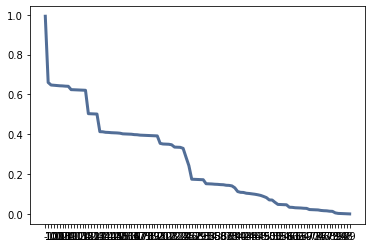

In [81]:
thinkplot.Plot(sf)
thinkplot.Cdf(cdf, alpha=0.2)
thinkplot.Config(loc='center left')

In [41]:
hf = sf.MakeHazardFunction(label='hazard')
print(hf[0])

0.007101355713363455


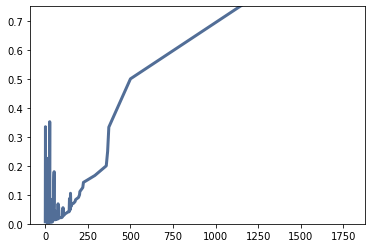

In [82]:
thinkplot.Plot(hf)
thinkplot.Config(ylim=[0, 0.75], loc='upper left')

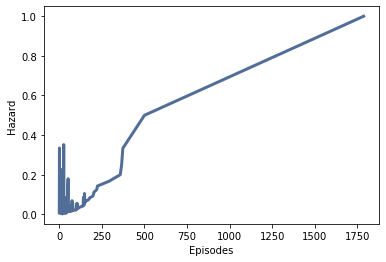

In [83]:
x = dataa[(dataa['Score']>5)].Episodes
y = dataa[(dataa['Score']<5)].Episodes
hf = EstimateHazardFunction(x, y)
thinkplot.Plot(hf)
thinkplot.Config(xlabel='Episodes',
                 ylabel='Hazard')

In [84]:
def ResampleSurvival(dataa, iters=70):
    _, sf = EstimateMarriageSurvival(dataa)
    thinkplot.Plot(sf)

    low, high = dataa.Episodes.min(), dataa.Episodes.max()
    ts = np.arange(low, high, 1/12.0)

    ss_seq = []
    for _ in range(iters):
        sample = thinkstats2.ResampleRows(dataa)
        _, sf = EstimateMarriageSurvival(sample)
        ss_seq.append(sf.Probs(ts))

    low, high = thinkstats2.PercentileRows(ss_seq, [5, 35])
    thinkplot.FillBetween(ts, low, high, color='gray', label='90% CI')

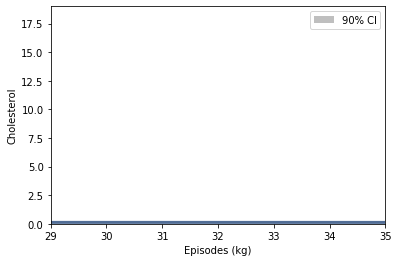

In [85]:
ResampleSurvival(dataa)
thinkplot.Config(xlabel='Episodes (kg)',
                 ylabel='Cholesterol',
                 xlim=[29, 35],
                 ylim=[0, 19],
                 loc='upper right')